In [1]:
import glob
import msgpack
import pandas as pd
import numpy as np
import numba as nb
import seaborn as sns
import itertools
from collections import defaultdict
import importlib # for reloading modules
pd.set_option('display.max_columns', None) # show all columns
import pickle
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_format = 'retina'

# conda install pytorch-lightning -c conda-forge
from torch import nn
import torch
print(torch.__version__)

# from tqdm.notebook import tqdm
# import tensorflow as tf
import tensorboard as tb

1.7.1


https://www.tensorflow.org/tensorboard/dataframe_api

tensorboard dev upload --logdir <logdir>

In [2]:
# https://tensorboard.dev/experiment/tam1ajndRyG5W0D4pm1sXQ/
experiment_id = "tam1ajndRyG5W0D4pm1sXQ"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df_ = experiment.get_scalars()
df = df_.copy()

In [3]:
print(df["run"].unique())

['pos_soft_0.5_0' 'pos_soft_0.5_1' 'pos_soft_0.5_2' 'pos_soft_1.0_0'
 'pos_soft_1.0_1' 'pos_soft_1.0_2' 'pos_soft_1.0_3' 'pos_soft_2.0_0'
 'pos_soft_2.0_1' 'pos_soft_2.0_2' 'pos_soft_4.0_0' 'pos_soft_4.0_1'
 'pos_soft_4.0_2' 'pos_soft_6.0_0' 'pos_soft_6.0_1' 'pos_soft_6.0_2'
 'soft_1.0_0' 'soft_1.0_1' 'soft_1.0_2' 'soft_6.0_0' 'soft_6.0_1'
 'soft_6.0_2']


In [4]:
print(df["tag"].unique())

['avg_length/train' 'running_reward/train']


In [5]:
df = df[np.logical_and(df.run.str.startswith("pos"),df.tag.str.startswith("avg_length"))]

In [6]:
splits = df.run.str.split("_",expand=True)
df["stifness_scale"] =splits = splits[2]
df

,run,tag,step,value,stifness_scale
0,pos_soft_0.5_0,avg_length/train,0,5.800000,0.5
1,pos_soft_0.5_0,avg_length/train,20,157.399994,0.5
2,pos_soft_0.5_0,avg_length/train,40,165.750000,0.5
3,pos_soft_0.5_0,avg_length/train,60,176.149994,0.5
4,pos_soft_0.5_0,avg_length/train,80,195.949997,0.5
...,...,...,...,...,...
6204,pos_soft_6.0_2,avg_length/train,3920,1375.949951,6.0
6205,pos_soft_6.0_2,avg_length/train,3940,1340.750000,6.0
6206,pos_soft_6.0_2,avg_length/train,3960,1206.150024,6.0
6207,pos_soft_6.0_2,avg_length/train,3980,1266.099976,6.0


Text(0, 0.5, 'avg length')

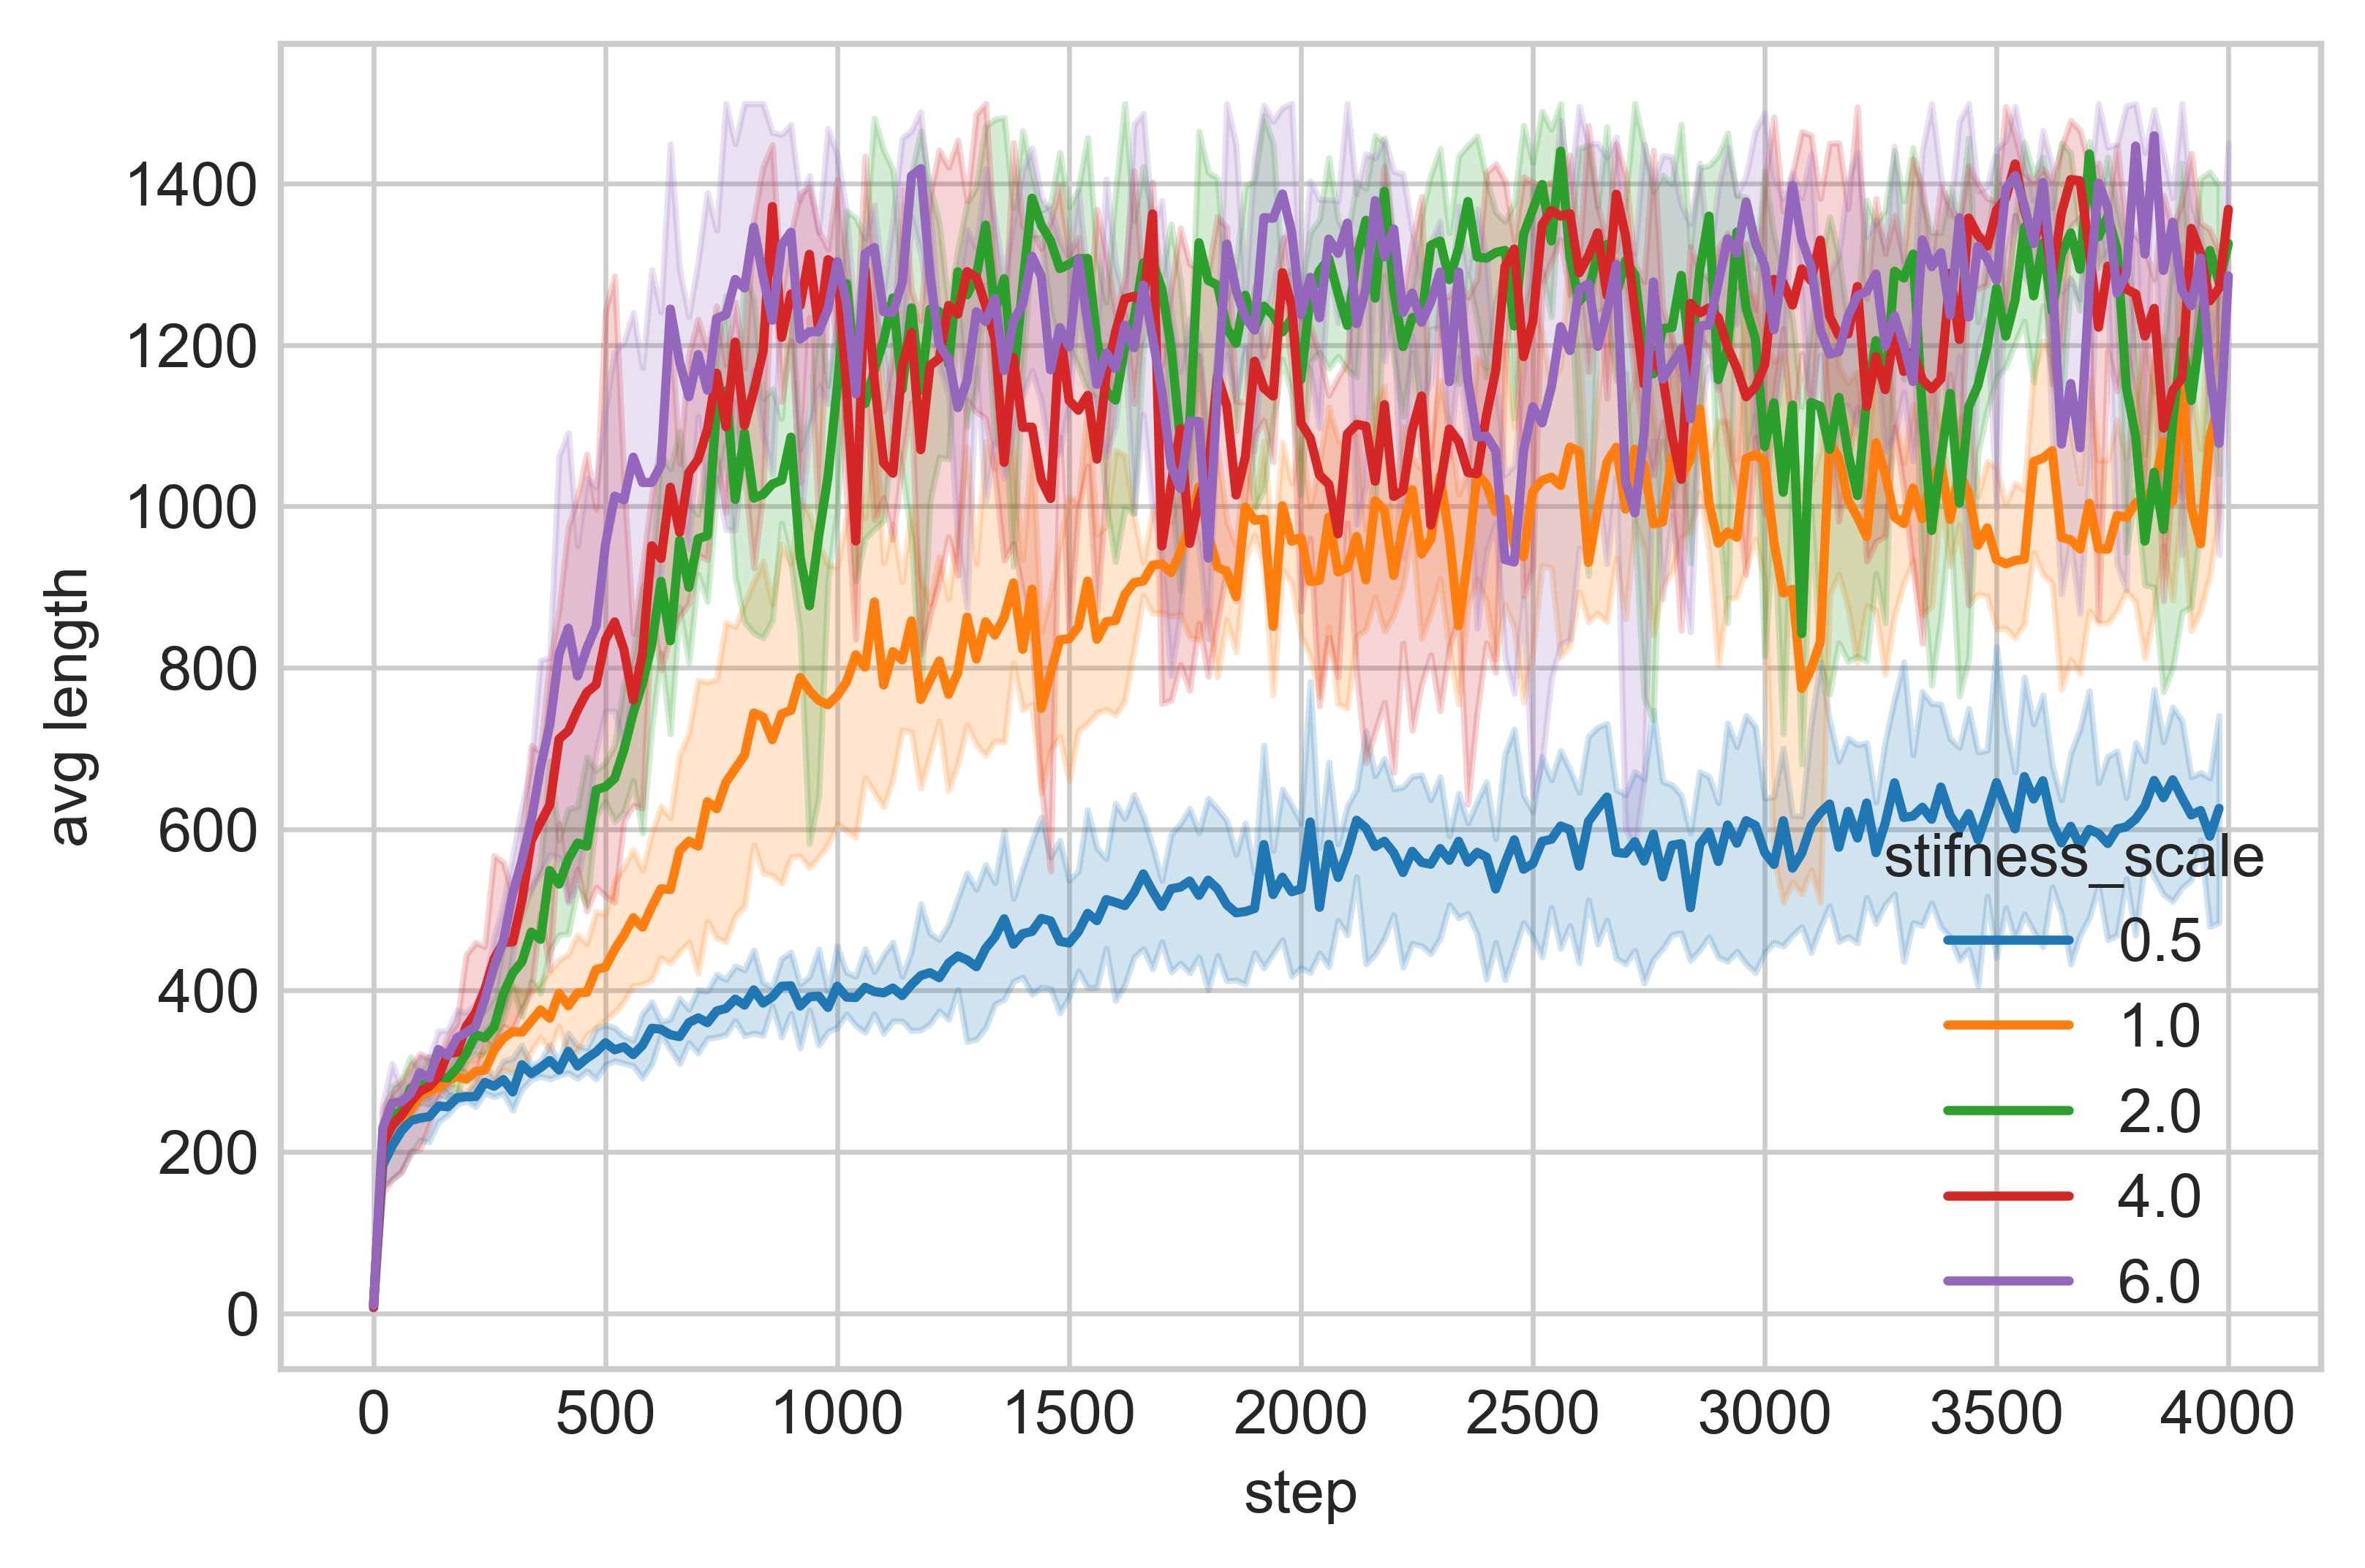

In [7]:
plt.figure(dpi=300)
ax = sns.lineplot(data=df,x="step",y = "value",hue = "stifness_scale")
ax.set_ylabel("avg length")